# CLASSIFICATION ASSIGNMENT


In [768]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from mlxtend.preprocessing import minmax_scaling

In [769]:
# pip install xlrd

In [770]:
data = pd.read_excel('iris.xls')

In [771]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [772]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [773]:
data.shape

(150, 5)

In [774]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [775]:
data.median()

C:\Users\User\AppData\Local\Temp\ipykernel_9204\4184645713.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


SL    5.80
SW    3.00
PL    4.35
PW    1.30
dtype: float64

## missing values handling

In [776]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [777]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [778]:
num_cols = data[['SL','SW','PL','PW']]

In [779]:
num_cols.isna().sum()

SL    7
SW    6
PL    6
PW    0
dtype: int64

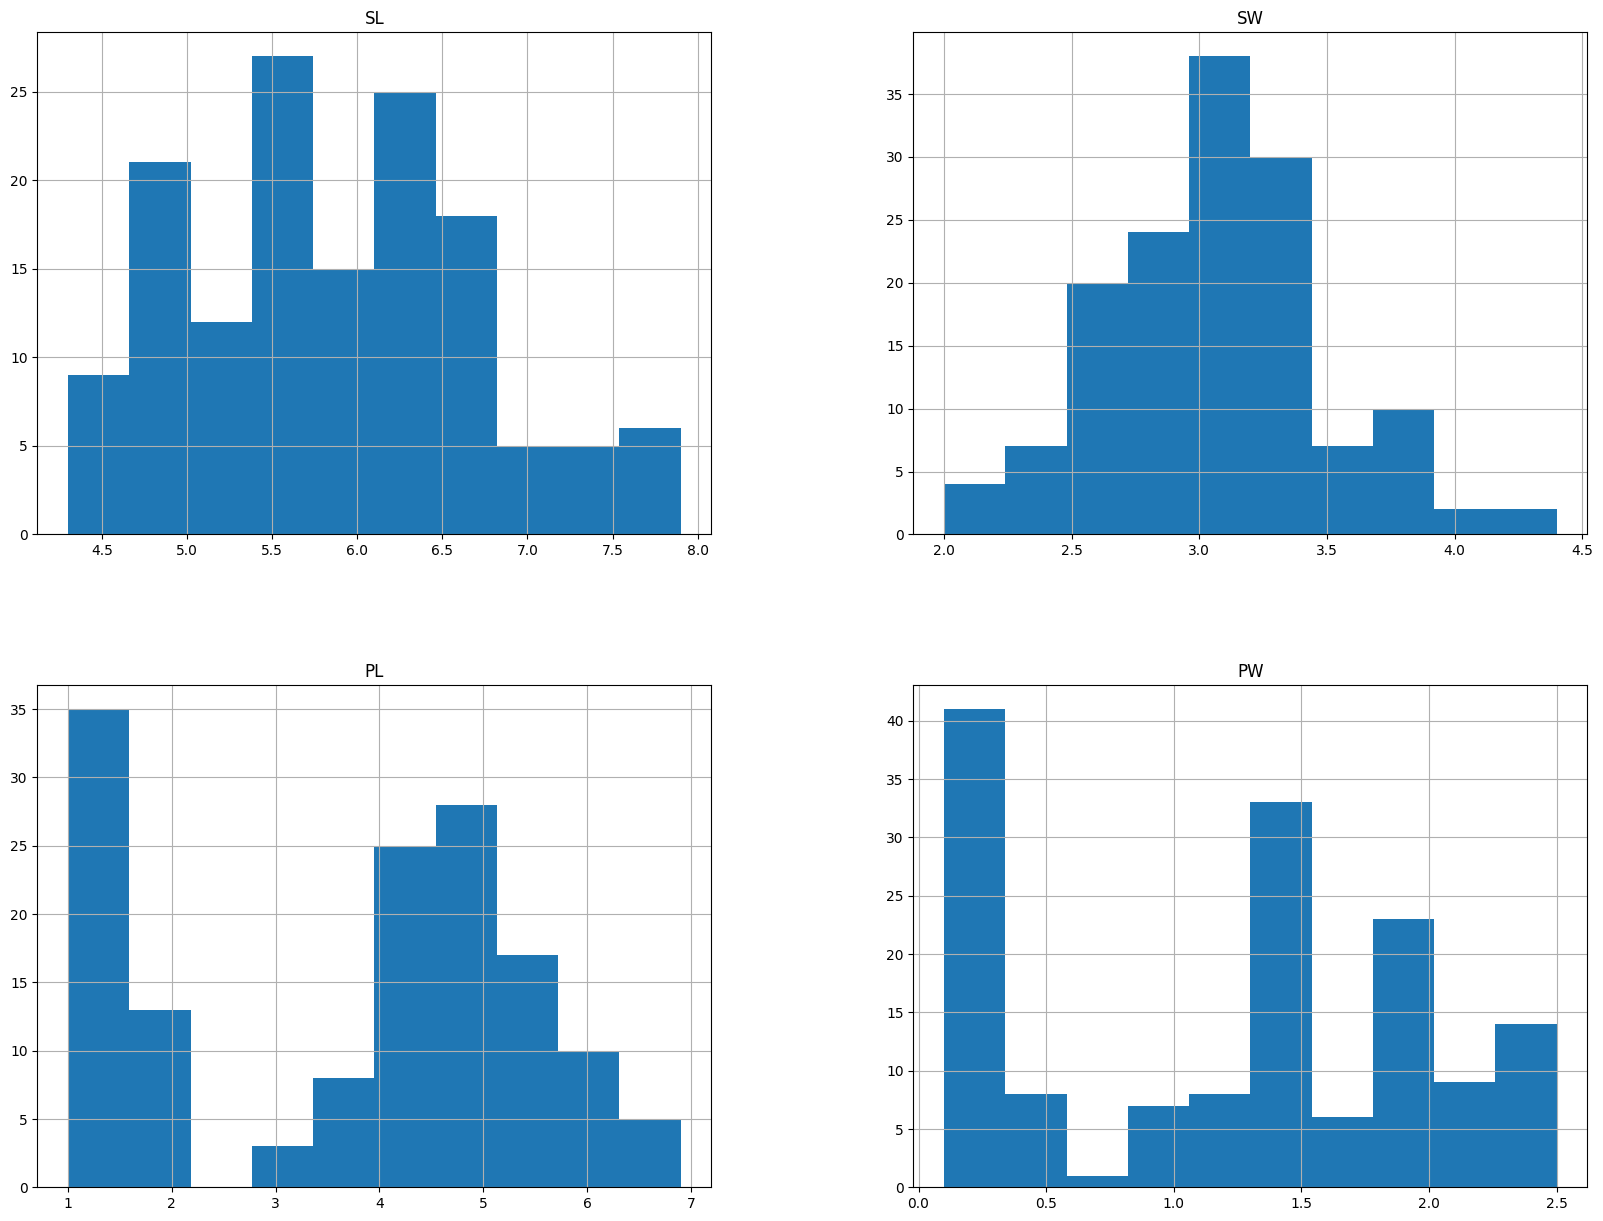

In [780]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [781]:
data.skew(axis=0, skipna=True, numeric_only = True)

SL    0.306823
SW    0.377818
PL   -0.268905
PW   -0.104997
dtype: float64

In [782]:

# We can fill these missing values either using mean or median
data['SL'] = data['SL'].fillna(data['SL'].median())
data['SW'] = data['SW'].fillna(data['SW'].median())
data['PL'] = data['PL'].fillna(data['PL'].mean())
data['PW'] = data['PW'].fillna(data['PW'].mean())

In [783]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40000,0.2,Iris-setosa
1,4.9,3.0,1.40000,0.2,Iris-setosa
2,5.8,3.2,1.30000,0.2,Iris-setosa
3,4.6,3.1,1.50000,0.2,Iris-setosa
4,5.0,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20000,2.3,Iris-virginica
146,6.3,2.5,5.00000,1.9,Iris-virginica
147,6.5,3.0,3.75625,2.0,Iris-virginica
148,6.2,3.4,5.40000,2.3,Iris-virginica


In [784]:
# Another method

# for col in num_cols:
#     data[col] = data[col].fillna(data[col].median())


In [785]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

## Managing Outliers

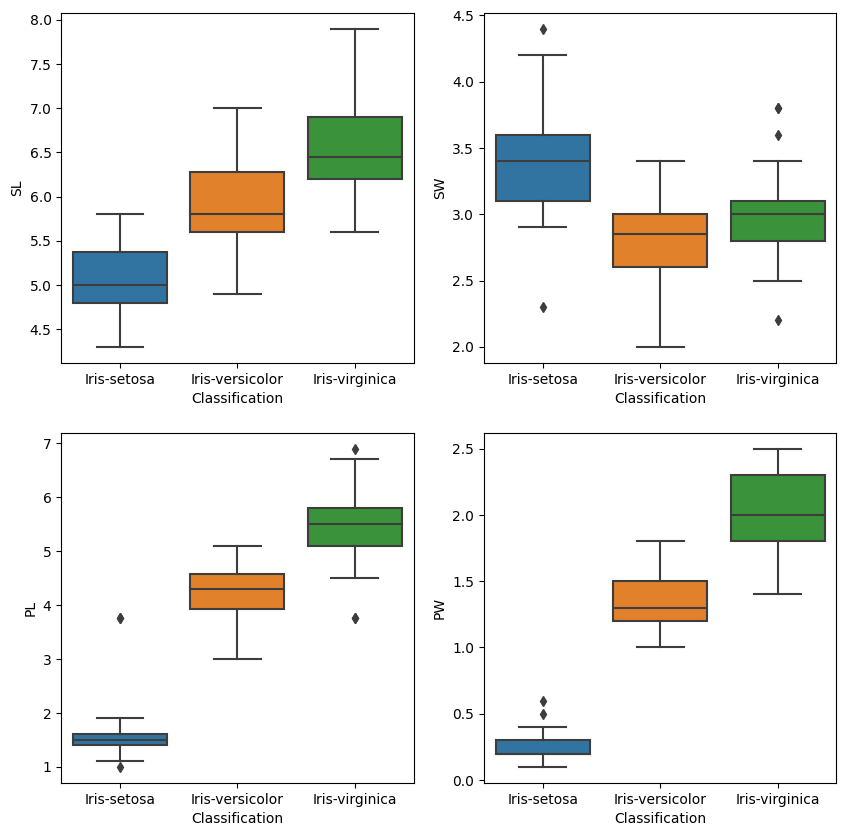

In [786]:

def graph(y):
    sns.boxplot(x="Classification", y=y, data=data)
 
plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SL')
 
plt.subplot(222)
graph('SW')
 
plt.subplot(223)
graph('PL')
 
plt.subplot(224)
graph('PW')
 
plt.show()

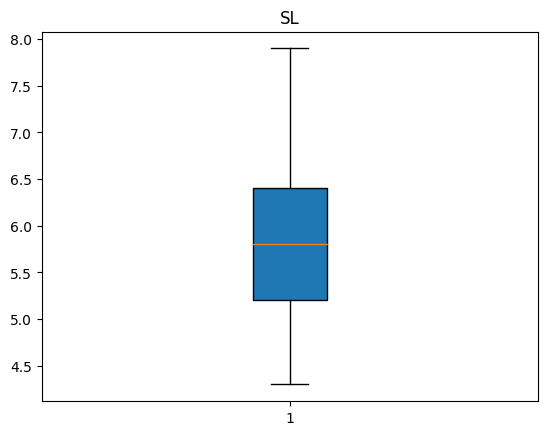

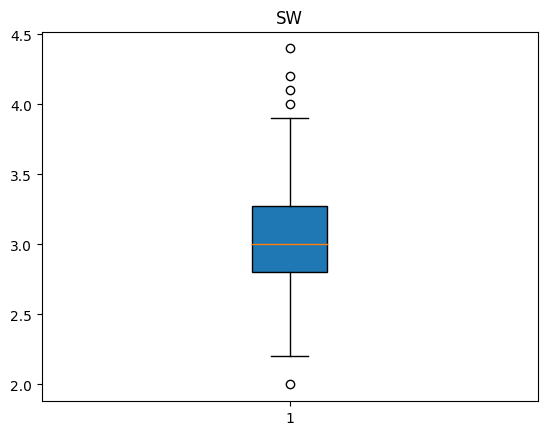

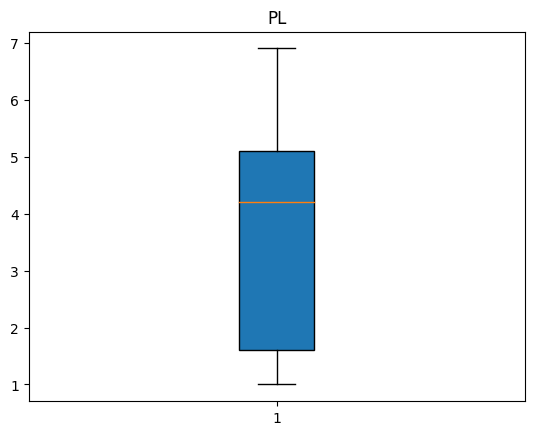

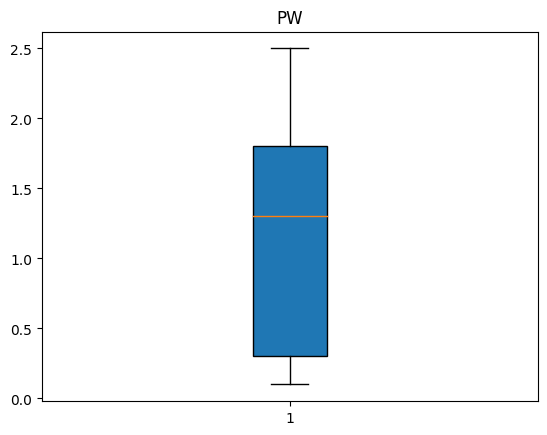

In [787]:
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i],patch_artist=True)
    plt.title(i)

In [788]:
Q1 = np.percentile(data['SW'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['SW'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['SW'], 75, interpolation = 'midpoint')

C:\Users\User\AppData\Local\Temp\ipykernel_9204\1709224240.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['SW'], 25, interpolation = 'midpoint')
C:\Users\User\AppData\Local\Temp\ipykernel_9204\1709224240.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['SW'], 50, interpolation = 'midpoint')
C:\Users\User\AppData\Local\Temp\ipykernel_9204\1709224240.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher'

In [789]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [790]:
data['SW'].median()

3.0

In [791]:
IQR = Q3-Q1

In [792]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
#  The values below the lower limit nd above the upper limit are outliers
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [793]:
outlier = []
for x in data['SW']:
    if((x>up_lim or (x<low_lim))):
        outlier.append(x)

In [794]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

### Removing outliers

In [795]:
# Finding index for Removing ouliers
ind1 = data['SW'] < low_lim
data.loc[ind1].index

Int64Index([60], dtype='int64')

In [796]:
ind2 = data['SW'] > up_lim
data.loc[ind2].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [797]:
# drop the specified outlier
data.drop([60, 14, 15, 32, 33], inplace = True)

In [798]:
# Finding index for Removing ouliers
ind1 = data['SW'] < low_lim
data.loc[ind1].index


Int64Index([], dtype='int64')

In [799]:
ind2 = data['SW'] > up_lim
data.loc[ind2].index

Int64Index([], dtype='int64')

In [800]:
data.shape

(145, 5)

In [801]:

# Finding duplicates
res = data.duplicated().sum()
res

3

### Remove Duplicate Entries

In [805]:
# Remove duplicate entries
data = data.drop_duplicates()
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40000,0.2,Iris-setosa
1,4.9,3.0,1.40000,0.2,Iris-setosa
2,5.8,3.2,1.30000,0.2,Iris-setosa
3,4.6,3.1,1.50000,0.2,Iris-setosa
4,5.0,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20000,2.3,Iris-virginica
146,6.3,2.5,5.00000,1.9,Iris-virginica
147,6.5,3.0,3.75625,2.0,Iris-virginica
148,6.2,3.4,5.40000,2.3,Iris-virginica


In [806]:
data.shape

(142, 5)

In [807]:
res = data.duplicated().sum()
res

0

### One Hot Encoding

In [808]:
data1 = pd.get_dummies(data)

In [809]:
data1

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.40000,0.2,1,0,0
1,4.9,3.0,1.40000,0.2,1,0,0
2,5.8,3.2,1.30000,0.2,1,0,0
3,4.6,3.1,1.50000,0.2,1,0,0
4,5.0,3.6,1.40000,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.20000,2.3,0,0,1
146,6.3,2.5,5.00000,1.9,0,0,1
147,6.5,3.0,3.75625,2.0,0,0,1
148,6.2,3.4,5.40000,2.3,0,0,1


### label encoding

In [810]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Classification']= label_encoder.fit_transform(data['Classification'])
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40000,0.2,0
1,4.9,3.0,1.40000,0.2,0
2,5.8,3.2,1.30000,0.2,0
3,4.6,3.1,1.50000,0.2,0
4,5.0,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20000,2.3,2
146,6.3,2.5,5.00000,1.9,2
147,6.5,3.0,3.75625,2.0,2
148,6.2,3.4,5.40000,2.3,2


### Scaling and normalization

In [811]:
df = data

df_scaled = minmax_scaling(df, columns=df.columns)
df_scaled

,SL,SW,PL,PW,Classification
0,0.222222,0.764706,0.067797,0.041667,0.0
1,0.166667,0.470588,0.067797,0.041667,0.0
2,0.416667,0.588235,0.050847,0.041667,0.0
3,0.083333,0.529412,0.084746,0.041667,0.0
4,0.194444,0.823529,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.470588,0.711864,0.916667,1.0
146,0.555556,0.176471,0.677966,0.750000,1.0
147,0.611111,0.470588,0.467161,0.791667,1.0
148,0.527778,0.705882,0.745763,0.916667,1.0


In [812]:
# from sklearn.preprocessing import MinMaxScaler

# df = data.drop('Classification',axis = 1)

# scaler = MinMaxScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# df_scaled

C:\Users\User\AppData\Local\Temp\ipykernel_9204\3351015155.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df,ax=axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_9204\3351015155.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_scaled,ax=axes[1])


Text(0.5, 1.0, 'SCALED DATA')

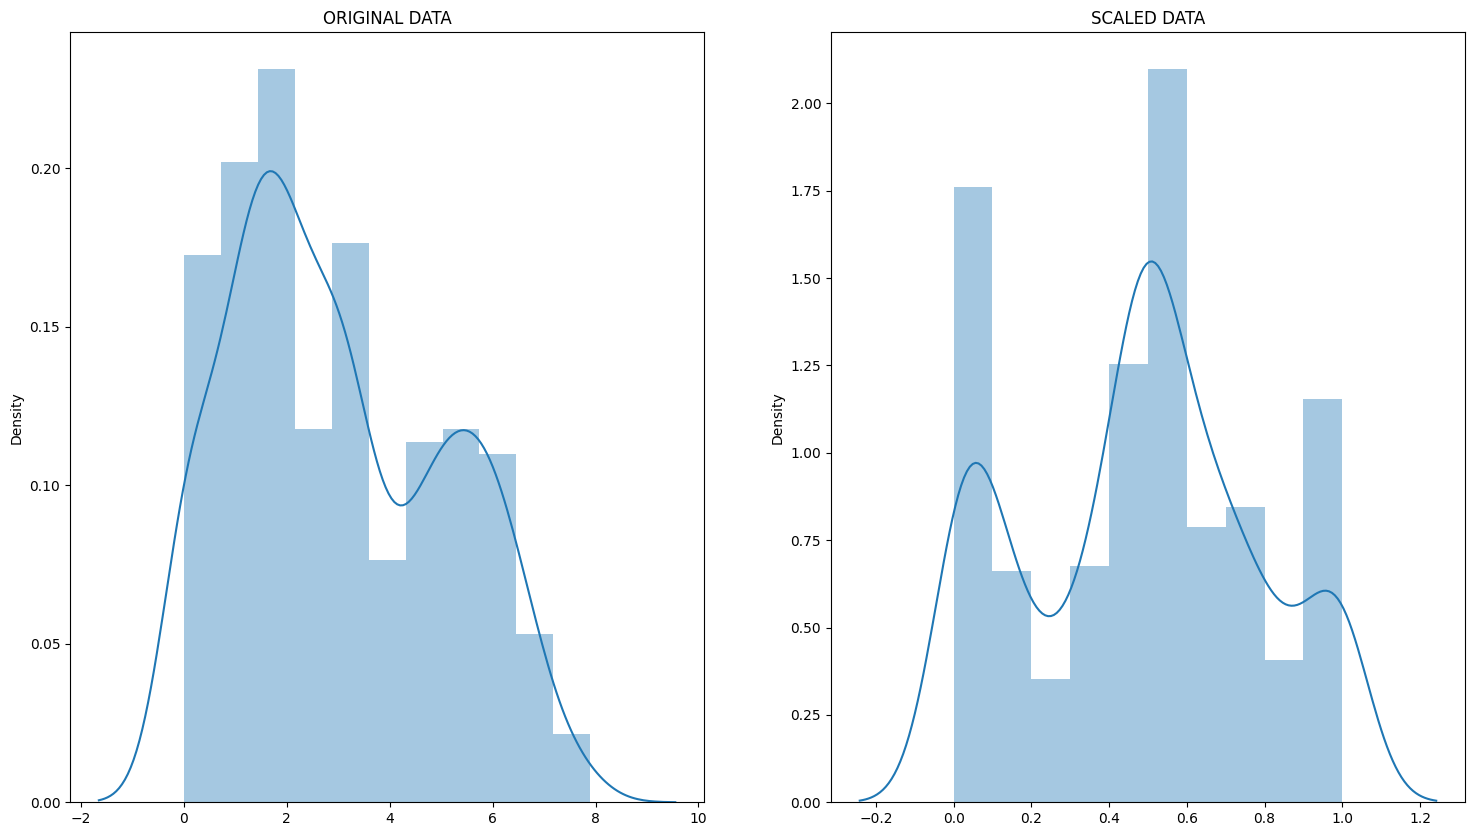

In [813]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

sns.distplot(df,ax=axes[0])
axes[0].set_title("ORIGINAL DATA")

sns.distplot(df_scaled,ax=axes[1])
axes[1].set_title("SCALED DATA")


In [814]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
x.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [815]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int32

In [816]:
from sklearn.model_selection import train_test_split
#split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [817]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 106 samples 
test set size: 36 samples


# Logistic Regression

In [818]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [819]:
y_pred

array([2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2,
       2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 2])

In [820]:
y_test

138    2
21     0
88     1
103    2
63     1
12     0
105    2
72     1
73     1
20     0
57     1
84     1
100    2
122    2
137    2
71     1
29     0
76     1
131    2
80     1
11     0
125    2
116    2
119    2
62     1
51     1
9      0
4      0
28     0
130    2
36     0
104    2
42     0
18     0
10     0
148    2
Name: Classification, dtype: int32

In [821]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score

In [822]:
confusion_matrix(y_test, y_pred)

array([[10,  2,  0],
       [ 0, 11,  0],
       [ 0,  1, 12]], dtype=int64)

In [823]:
print('Accuracy =', accuracy_score(y_test,y_pred))
print('f1 score =', f1_score(y_test,y_pred, average ='weighted'))
print('precision =', precision_score(y_test,y_pred, average ='weighted'))
print('recall =', recall_score(y_test,y_pred, average ='weighted'))

Accuracy = 0.9166666666666666
f1 score = 0.9185858585858584
precision = 0.9345238095238094
recall = 0.9166666666666666


# KNN

In [824]:
from sklearn.neighbors import KNeighborsClassifier


In [825]:
metric_k = []
neighbors = np.arange(3,15)

In [826]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric ='euclidean')
    classifier.fit(x_train, y_train)
    y_predictions = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_predictions)
    metric_k.append(acc)

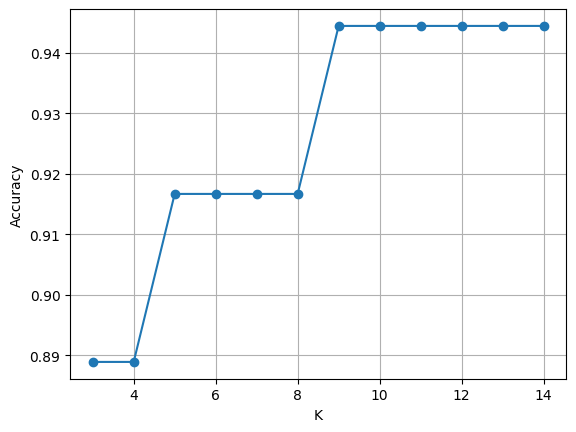

In [827]:
plt.plot(neighbors, metric_k,'o-')
plt.xlabel("K")
plt.ylabel('Accuracy')
plt.grid()

In [828]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric ='euclidean')
classifier.fit(x_train, y_train)
y_predictions = classifier.predict(x_test)

In [829]:
print('Accuracy = ', accuracy_score(y_test,y_predictions))
print('Precision = ', precision_score(y_test,y_predictions, average ='weighted'))
print('Recall = ', recall_score(y_test,y_predictions, average ='weighted'))
print('F1 Score = ', f1_score(y_test,y_predictions, average ='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy =  0.9166666666666666
Precision =  0.9232804232804234
Recall =  0.9166666666666666
F1 Score =  0.9164674116364938


array([[10,  2,  0],
       [ 0, 10,  1],
       [ 0,  0, 13]], dtype=int64)

### Both KNN and Logical regression shows almost same accuracy score

# SVM

In [830]:
from sklearn.svm import SVC

In [831]:
svm_cls = SVC(kernel ='linear')
svm_cls = svm_cls.fit(x_train, y_train)
y_pred_svm = svm_cls.predict(x_test)

In [832]:
accuracy_score(y_test, y_pred_svm)

0.9444444444444444

In [833]:
print('Accuracy = ', accuracy_score(y_test,y_pred_svm))
confusion_matrix(y_test,y_pred_svm)

Accuracy =  0.9444444444444444


array([[10,  2,  0],
       [ 0, 11,  0],
       [ 0,  0, 13]], dtype=int64)

# DecisionTree

In [834]:
from sklearn.tree import DecisionTreeClassifier
dt_cls = DecisionTreeClassifier()
dt_cls = dt_cls.fit(x_train, y_train)
y_pred_dt = dt_cls.predict(x_test)

In [835]:
confusion_matrix(y_test, y_pred_dt)

array([[12,  0,  0],
       [ 0, 11,  0],
       [ 0,  2, 11]], dtype=int64)

In [836]:
accuracy_score(y_test,y_pred_dt)

0.9444444444444444

In [837]:
print("Accuracy=", accuracy_score(y_test, y_pred_dt))

Accuracy= 0.9444444444444444


# RandomForest Classifier

In [838]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train, y_train)
y_pred_rf = rf_cls.predict(x_test)

In [839]:
confusion_matrix(y_test, y_pred_rf)

array([[10,  2,  0],
       [ 0, 11,  0],
       [ 0,  1, 12]], dtype=int64)

In [840]:
accuracy_score(y_test, y_pred_rf)

0.9166666666666666

# Among these 5 clasifiers 'SVM' and 'DecisionTree' shows the best accuracy